# Flight Delay Prediction

## Weather Data Processing
- Exploring <strong>2016_1.json</strong> weather Data to generalize
- Loading the json file into a Data Frame
- Isolating the weather data and examining its column structure
- Flattening the nested structure based on the required columns
- Filtering the required data columns
- Combining all the weather data after data handling into a df
- Ensuring by visualizing that the data has no missing values
- Storing df as <strong>weather_data.csv</strong> in the <strong>Data</strong> directory

## Prerequisites

In [1]:
# Loading the required modules
import pandas as pd
# import glob
import missingno as msno
%matplotlib inline

# Data for filtering
airports = ("ATL", "CLT", "DEN", "DFW", "EWR", "IAH", "JFK", "LAS", "LAX", "MCO", "MIA", "ORD", "PHX", "SEA", "SFO")
fields = ("windspeedKmph",
          "winddirDegree", 
          "weatherCode",
          "precipMM",
          "visibility",
          "pressure",
          "cloudcover",
          "DewPointF",
          "WindGustKmph",
          "tempF",
          "WindChillF",
          "humidity",
          "date",
          "time")
years = ("2016", "2017")

## Exploratory Data Analysis

### Loading Data

In [2]:
# Loading one json file to analyze its structure
data = pd.read_json("Data/Weather_Data/ATL/2016_1.json")
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,data
request,"[{'query': 'ATL, Hartsfield-Jackson Atlanta In..."
weather,"[{'mintempC': '5', 'maxtempF': '51', 'sunHour'..."


In [3]:
# Isolating the weather data and examining its columns
wd = data["data"]["weather"]
print(type(wd), end="\n\n")
print((pd.DataFrame(wd)).columns)

<class 'list'>

Index(['mintempC', 'maxtempF', 'sunHour', 'mintempF', 'maxtempC', 'hourly',
       'totalSnow_cm', 'date', 'astronomy', 'uvIndex'],
      dtype='object')


### Extracting Data

In [4]:
# columns hourly has a lot of useful nested fields that are of interest
# so the nested data needs flattening
wd_df = pd.json_normalize(data=wd)
wd_df.head()

,mintempC,maxtempF,sunHour,mintempF,maxtempC,hourly,totalSnow_cm,date,astronomy,uvIndex
0,5,51,7.5,42,11,"[{'windspeedKmph': '11', 'FeelsLikeF': '46', '...",0.0,2016-01-01,"[{'moon_phase': 'Waning Gibbous', 'moonrise': ...",0
1,2,48,9.0,35,9,"[{'windspeedKmph': '15', 'FeelsLikeF': '34', '...",0.0,2016-01-02,"[{'moon_phase': 'Last Quarter', 'moonrise': '0...",0
2,3,51,7.5,38,11,"[{'windspeedKmph': '10', 'FeelsLikeF': '37', '...",0.0,2016-01-03,"[{'moon_phase': 'Last Quarter', 'moonrise': '0...",0
3,-1,46,9.5,31,8,"[{'windspeedKmph': '13', 'FeelsLikeF': '37', '...",0.0,2016-01-04,"[{'moon_phase': 'Last Quarter', 'moonrise': '0...",0
4,1,43,10.0,33,6,"[{'windspeedKmph': '12', 'FeelsLikeF': '28', '...",0.0,2016-01-05,"[{'moon_phase': 'Waning Crescent', 'moonrise':...",0


### Flattening and Filtering

In [5]:
# flattening the data by one more column namely, hourly and, retaining the date column
wd_df = pd.json_normalize(data=wd, record_path="hourly", meta="date")
col1 = set(wd_df.columns)
wd_df = wd_df[list(fields)]
col2 = wd_df.columns
print(col1.intersection(col2))
wd_df

{'weatherCode', 'pressure', 'windspeedKmph', 'WindChillF', 'winddirDegree', 'visibility', 'DewPointF', 'date', 'tempF', 'humidity', 'cloudcover', 'WindGustKmph', 'precipMM', 'time'}


,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time
0,11,318,176,0.1,10,1023,100,47,17,49,46,91,2016-01-01,0
1,13,317,176,0.0,10,1023,100,44,22,46,42,92,2016-01-01,100
2,14,315,122,0.0,10,1023,100,41,26,43,38,92,2016-01-01,200
3,16,314,122,0.0,10,1023,100,38,30,40,33,93,2016-01-01,300
4,17,314,122,0.0,10,1023,100,38,30,40,33,93,2016-01-01,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,13,169,122,0.0,10,1015,96,54,20,60,60,82,2016-01-31,1900
740,13,165,122,0.0,10,1015,95,54,20,60,59,82,2016-01-31,2000
741,12,162,122,0.0,10,1015,95,54,20,59,59,83,2016-01-31,2100
742,13,164,122,0.0,10,1015,92,54,21,59,58,83,2016-01-31,2200


## Loading All the Weather Data

In [6]:
"""
NOT REQUIRED
# Loading all the csv files from the Data dir into a list with their relative path names
weather_data_path = "Data/Weather_Data/"
weather_data_files = [file for file in glob.iglob(weather_data_path + '**/*.json', recursive=True)]
print(weather_data_files)
"""

weather_data = list()
# Iterating over the files and performing data handling
for city in airports:
    for year in years:
        for month in range(1, 12+1):
            file = f"Data/Weather_Data/{city}/{year}_{month}.json"
            df = pd.read_json(file)
            wd = df["data"]["weather"] # list
            wd_df = pd.json_normalize(data=wd)
            wd_df = pd.json_normalize(data=wd, record_path="hourly", meta="date")
            wd_df = wd_df[list(fields)]
            wd_df["airport"] = city
            weather_data.append(wd_df)
            print(file)

Data/Weather_Data/ATL/2016_1.json
Data/Weather_Data/ATL/2016_2.json
Data/Weather_Data/ATL/2016_3.json
Data/Weather_Data/ATL/2016_4.json
Data/Weather_Data/ATL/2016_5.json
Data/Weather_Data/ATL/2016_6.json
Data/Weather_Data/ATL/2016_7.json
Data/Weather_Data/ATL/2016_8.json
Data/Weather_Data/ATL/2016_9.json
Data/Weather_Data/ATL/2016_10.json
Data/Weather_Data/ATL/2016_11.json
Data/Weather_Data/ATL/2016_12.json
Data/Weather_Data/ATL/2017_1.json
Data/Weather_Data/ATL/2017_2.json
Data/Weather_Data/ATL/2017_3.json
Data/Weather_Data/ATL/2017_4.json
Data/Weather_Data/ATL/2017_5.json
Data/Weather_Data/ATL/2017_6.json
Data/Weather_Data/ATL/2017_7.json
Data/Weather_Data/ATL/2017_8.json
Data/Weather_Data/ATL/2017_9.json
Data/Weather_Data/ATL/2017_10.json
Data/Weather_Data/ATL/2017_11.json
Data/Weather_Data/ATL/2017_12.json
Data/Weather_Data/CLT/2016_1.json
Data/Weather_Data/CLT/2016_2.json
Data/Weather_Data/CLT/2016_3.json
Data/Weather_Data/CLT/2016_4.json
Data/Weather_Data/CLT/2016_5.json
Data/Wea

Data/Weather_Data/MIA/2016_2.json
Data/Weather_Data/MIA/2016_3.json
Data/Weather_Data/MIA/2016_4.json
Data/Weather_Data/MIA/2016_5.json
Data/Weather_Data/MIA/2016_6.json
Data/Weather_Data/MIA/2016_7.json
Data/Weather_Data/MIA/2016_8.json
Data/Weather_Data/MIA/2016_9.json
Data/Weather_Data/MIA/2016_10.json
Data/Weather_Data/MIA/2016_11.json
Data/Weather_Data/MIA/2016_12.json
Data/Weather_Data/MIA/2017_1.json
Data/Weather_Data/MIA/2017_2.json
Data/Weather_Data/MIA/2017_3.json
Data/Weather_Data/MIA/2017_4.json
Data/Weather_Data/MIA/2017_5.json
Data/Weather_Data/MIA/2017_6.json
Data/Weather_Data/MIA/2017_7.json
Data/Weather_Data/MIA/2017_8.json
Data/Weather_Data/MIA/2017_9.json
Data/Weather_Data/MIA/2017_10.json
Data/Weather_Data/MIA/2017_11.json
Data/Weather_Data/MIA/2017_12.json
Data/Weather_Data/ORD/2016_1.json
Data/Weather_Data/ORD/2016_2.json
Data/Weather_Data/ORD/2016_3.json
Data/Weather_Data/ORD/2016_4.json
Data/Weather_Data/ORD/2016_5.json
Data/Weather_Data/ORD/2016_6.json
Data/Wea

## Combining All the Weather Data

In [7]:
# Concatenating the list of weather Data Frames
weather_data_df = pd.concat(weather_data)
print(weather_data_df.info(), end="\n\n")
# Storing the combined data as a csv file
weather_data_df.to_csv("Data/weather_data.csv")
weather_data_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263160 entries, 0 to 743
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   windspeedKmph  263160 non-null  object
 1   winddirDegree  263160 non-null  object
 2   weatherCode    263160 non-null  object
 3   precipMM       263160 non-null  object
 4   visibility     263160 non-null  object
 5   pressure       263160 non-null  object
 6   cloudcover     263160 non-null  object
 7   DewPointF      263160 non-null  object
 8   WindGustKmph   263160 non-null  object
 9   tempF          263160 non-null  object
 10  WindChillF     263160 non-null  object
 11  humidity       263160 non-null  object
 12  date           263160 non-null  object
 13  time           263160 non-null  object
 14  airport        263160 non-null  object
dtypes: object(15)
memory usage: 32.1+ MB
None



(263160, 15)

## Checking for Missing Data

AxesSubplot(0.125,0.125;0.698618x0.755)
windspeedKmph    0
winddirDegree    0
weatherCode      0
precipMM         0
visibility       0
pressure         0
cloudcover       0
DewPointF        0
WindGustKmph     0
tempF            0
WindChillF       0
humidity         0
date             0
time             0
airport          0
dtype: int64


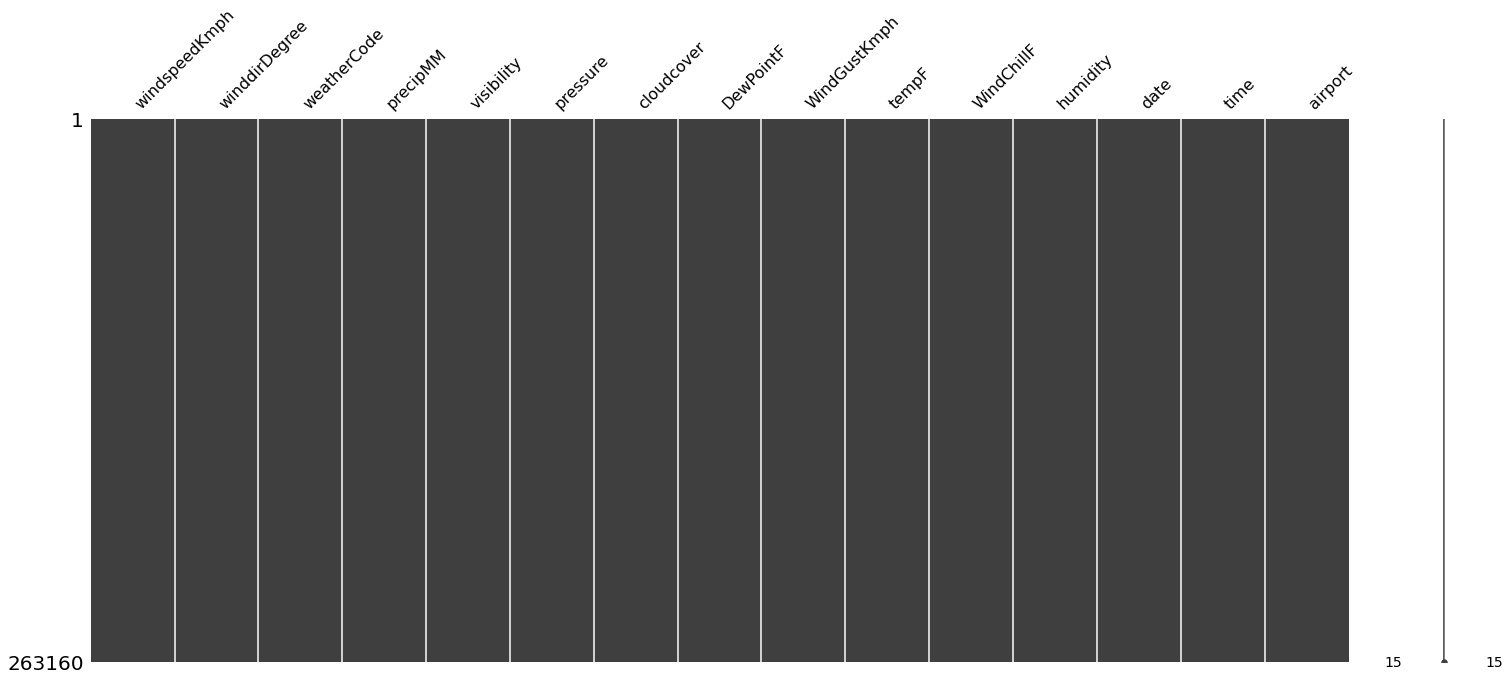

In [8]:
print(msno.matrix(weather_data_df))
print(weather_data_df.isnull().sum())

In [9]:
weather_data_df.head()

,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time,airport
0,11,318,176,0.1,10,1023,100,47,17,49,46,91,2016-01-01,0,ATL
1,13,317,176,0.0,10,1023,100,44,22,46,42,92,2016-01-01,100,ATL
2,14,315,122,0.0,10,1023,100,41,26,43,38,92,2016-01-01,200,ATL
3,16,314,122,0.0,10,1023,100,38,30,40,33,93,2016-01-01,300,ATL
4,17,314,122,0.0,10,1023,100,38,30,40,33,93,2016-01-01,400,ATL


In [10]:
weather_data_df.tail()

,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time,airport
739,2,279,116,0.0,10,1019,51,52,5,55,55,92,2017-12-31,1900,SFO
740,2,255,248,0.0,10,1019,44,53,5,55,55,92,2017-12-31,2000,SFO
741,1,230,248,0.0,10,1020,38,53,5,55,55,93,2017-12-31,2100,SFO
742,2,212,248,0.0,10,1020,58,52,4,53,53,95,2017-12-31,2200,SFO
743,2,194,122,0.0,10,1020,79,51,4,52,52,97,2017-12-31,2300,SFO


In [11]:
print(weather_data_df.shape, end="\n\n")
print(weather_data_df.columns)

(263160, 15)

Index(['windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph',
       'tempF', 'WindChillF', 'humidity', 'date', 'time', 'airport'],
      dtype='object')
